In [1]:
import otter
# nb_name should be the name of your notebook without the .ipynb extension
nb_name = "p9"
py_filename = nb_name + ".py"
grader = otter.Notebook(nb_name + ".ipynb")

In [2]:
import p9_test

In [3]:
# PLEASE FILL IN THE DETAILS
# Enter none if you don't have a project partner

# project: p9
# submitter: ratushko
# partner: ppopuri

# Project 9: Analyzing the Movies

## Learning Objectives:

In this project, you will demonstrate your ability to:
- Use `matplotlib` to plot bar graphs and visualize statistics
- Process data using dictionaries and lists that you build
- Implement binning by writing algorithms that create dictionaries
- Custom sort a list using the keyword parameter `key`'s argument.

Please go through [lab-p9](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f22-projects/-/tree/main/lab-p9) before starting this project. The lab introduces some useful techniques necessary for this project.

## Note on Academic Misconduct:

**IMPORTANT**: p8 and p9 are two parts of the same data analysis. You **cannot** switch project partners between these two projects. That is if you partnered up with someone for p8, you have to work on p9 with the **same partner**. Now may be a good time to review [our course policies](https://cs220.cs.wisc.edu/f22/syllabus.html).

## Testing your code:

Along with this notebook, you must have downloaded the file `p9_test.py`. If you are curious about how we test your code, you can explore this file, and specifically the value of the variable `expected_json`, to understand the expected answers to the questions.

**Important:** `p9_test.py` **cannot** verify your answers when the output is an image. Your **plots** will be **manually graded** by graders, so you must **manually** confirm that your plots look correct by comparing with the images provided in the notebook.

## Introduction:

In p8, you created very useful helper functions to parse the raw IMDb dataset. You also created useful data structures to store the data. In this project, you will be building on the work you did in p8 to analyze your favorite movies. This is a shorter project than usual, and **p9 will only have 10 questions for you to solve**.

## Data:

Between p8 and p9, the movies dataset has been updated to hold many more movies. The `movies.csv` file that you will use in p9 contains ~200,000 movies, and the `mapping.csv` file contains data on ~600,000 movie titles and people. Thankfully, the data in both files are stored in exactly the same format as the files you worked with in p8. So, all your functions should continue to work in p9. Please remember to download the [latest datasets](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f22-projects/-/tree/main/p9) before starting this project. 

## Project Requirements:

You **may not** hardcode indices or the lengths of lists in your code. We'll **manually deduct** points from your autograder score on Gradescope during code review.

**Store** your final answer for each question in the **variable specified for each question**. This step is important because Otter grades your work by comparing the value of this variable against the correct answer.

For some of the questions, we'll ask you to write (then use) a function to compute the answer. If you compute the answer **without** creating the function we ask you to write, we'll **manually deduct** points from your autograder score on Gradescope, even if the way you did it produced the correct answer.

Required Functions:
- `get_movies`
- `plot_dict`
- `bucketize`

In this project, you will also be required to define certain **data structures**. If you do not create these data structures exactly as specified, we'll **manually deduct** points from your autograder score on Gradescope, even if the way you did it produced the correct answer.

Required Data Structures:
- `movies`
- `cast_buckets`
- `director_buckets`
- `genre_buckets`
- `year_buckets`

You are only allowed to define these data structures **once** and we'll **manually deduct** points from your autograder score on Gradescope if you redefine the values of these variables.

In this project, you will be asked to create **lists** of movies. For all such questions, **unless it is explicitly mentioned otherwise**, the movies should be in the **same order** as in the `movies.csv` file. Similarly, for each movie, the **list** of `genres`, `directors`, and `cast` members should always be in the **same order** as in the `movies.csv` file.

Students are only allowed to use Python commands and concepts that have been taught in the course prior to the release of p9. We will **manually deduct** points from your autograder score on Gradescope otherwise.

For more details on what will cause you to lose points during code review and specific requirements, please take a look at the [Grading rubric](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f22-projects/-/blob/main/p9/rubric.md).

## Project Questions and Functions:

In [4]:
# it is considered a good coding practice to place all import statements at the top of the notebook
# please place all your import statements in this cell if you need to import any more modules for this project
import csv
import pandas
import matplotlib

## Loading the Movies Data

For all these questions, we will be looking at the movies in `mapping.csv` and `movies.csv`. You can load the list of movies using the functions you wrote in the last project.

Copy the functions you wrote in `p8.ipynb` to `p9.ipynb` to read the movies data. The functions you should include are `process_csv`, `get_mapping`, `get_raw_movies`, and `get_movies` along with any helper functions you used to write these. Do **not** copy/paste `find_specific_movies` here. Later in p9, we will provide you with a simpler version of that function, which does not require the use of the `copy` module.

In [5]:
def process_csv(filename):
    example_file = open(filename, encoding="utf-8")
    example_reader = csv.reader(example_file)
    example_data = list(example_reader)
    example_file.close()
    return example_data

In [6]:
# copy/paste the definitions of get_mapping, get_raw_movies, get_movies from p8
# as well as any helper functions used by these functions here
map_dict = {}
def get_mapping(path):
    """
    get_mapping(path) converts a mapping csv in 'path' 
    into a dict with keys as IDs and values as names
    """ 
    for row in process_csv(path):
        map_dict[row[0]] = row[1]
        
    return map_dict

In [7]:
def get_raw_movies(path):
    """
    get_raw_movies(path) converts a movies csv in 'path' 
    into a list of dicts with column names as keys and
    the corresponding type converted values as the values
    """
    file_data = process_csv(path)
    csv_header = file_data[0]
    csv_rows = file_data[1:]
    raw_movies_list = [] # use this empty list to append your dictionary
    for row in range(len(csv_rows)):
        movie_dict = {}
        movie_dict["title"] = csv_rows[row][csv_header.index("title")]
        movie_dict["year"] = int(csv_rows[row][csv_header.index("year")])
        movie_dict["duration"] = int(csv_rows[row][csv_header.index("duration")])
        movie_dict["genres"] = csv_rows[row][csv_header.index("genres")].split(", ")
        movie_dict["rating"] = float(csv_rows[row][csv_header.index("rating")])
        movie_dict["directors"] = csv_rows[row][csv_header.index("directors")].split(", ")
        movie_dict["cast"] = csv_rows[row][csv_header.index("cast")].split(", ")
        raw_movies_list.append(movie_dict) # replace with your code
        
    return raw_movies_list

In [8]:
def get_movies(movies_path, mapping_path):
    """
    get_movies(movies_path, mapping_path) converts a movies csv in 'movies_path' 
    into a list of dicts with column names as keys and the corresponding 
    type converted values as the values; then uses the mapping csv in 'mapping_path'
    to replace the IDs of the titles, cast, and directors into actual names
    """
    raw_movies = get_raw_movies(movies_path)
    map_movies = get_mapping(mapping_path)
    for movie in raw_movies:
        movie_title_id = movie["title"]
        movie_dir_list = movie["directors"]
        movie_cast_list = movie["cast"]
        movie["title"] = map_movies[movie_title_id]
        dir_list = []
        for dir_id in movie_dir_list:
            dir_list.append(map_movies[dir_id])
        movie['directors'] = dir_list
        cast_list = []
        for cast_id in movie_cast_list:
            cast_list.append(map_movies[cast_id])
        movie['cast'] = cast_list
    return raw_movies

Now, you can use `get_movies` to read the data in `movies.csv` and `mapping.csv` as you did in p8.

In [9]:
# create a list of dictionaries named 'movies' to store the data in 'movies.csv' and 'mapping.csv' as in p8
# do NOT display the value of this variable anywhere in this notebook
movies = get_movies("movies.csv", "mapping.csv")

There should be *198610* **dictionaries** in the **list** `movies` and the first entry of `movies` should be a **dictionary** that looks as follows:

```python
{'title': 'Lejos de África',
 'year': 1996,
 'duration': 115,
 'genres': ['Drama'],
 'rating': 6.4,
 'directors': ['Cecilia Bartolomé'],
 'cast': ['Alicia Bogo', 'Xabier Elorriaga', 'Isabel Mestres', 'Carlos Cruz']}
```

**Warning:** At this stage, it is expected that the function `get_movies` works correctly, and that `movies` is defined as it was in p8. If not, your code will run into issues in p9. So, make sure that this function works properly before you start p9. You can do that by **inserting a new cell** in Jupyter below this cell and verifying that the size of your variable `movies`, and that the first **dictionary** in `movies` are as they should be. 

Now, copy over the functions `plot_dict`, `median` and `year_to_decade` from lab-p9.

In [10]:
# copy/paste the definitions of plot_dict, median, year_to_decade from lab-p9
# as well as any helper functions used by these functions here
def plot_dict(d, label="Please Label Me!"):
    """plot_dict(d, label) creates a bar plot using the 
    dictionary 'd' and labels the y-axis as 'label'"""
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

In [11]:
def median(items):
    """
    median(items) returns the median of the list `items`
    """
    sorted_list = sorted(items)
    list_len = len(sorted_list)
    if list_len % 2 == 1:
        return sorted_list[list_len // 2]
    else:
        first_middle = sorted_list[list_len//2 - 1]
        second_middle = sorted_list[list_len//2]
        return (first_middle + second_middle) / 2

In [12]:
def year_to_decade(year):
    if year % 10 == 0:
        decade = str(year-9) + ' to ' + str(year)
        return decade
    else:
        return year_to_decade(year + 1)

In p8, you were provided with a function `find_specific_movies` which functioned as some sort of a 'search bar' for the movies dataset. However, in order to use that function properly, you had to used the `copy` module to pass a *copy* of your list of movies to `find_specific_movies`. Making copies frequently is **not** a good coding practice. For this project, we will provide **a new version** of `find_specific_movies` that does **not** require `copy`. Please go through the following function:

In [13]:
# modified find_specific_movies (doesn't require using copy module)
def find_specific_movies(movies, keyword):
    """
    find_specific_movies(movies, keyword) takes a list of movie dictionaries 
    and a keyword; it returns a list of movies that contain the keyword
    in either its title, genre, cast or directors.
    """
    movies_with_keyword = []
    for movie in movies:
        if (keyword in movie['title']) or (keyword in movie['genres']) \
            or (keyword in movie['directors']) or (keyword in movie['cast']):
            movies_with_keyword.append(movie)
    return movies_with_keyword

**Important:** Even when you are not explicitly prompted to do so, using the `find_specific_movies` function cleverly can simplify your code significantly. Keep an eye out for how you can simplify your code by making use of `find_specific_movies`.

### Analyzing the Movies data

**Question 1:** What is the **median** `rating` of the *Harry Potter* movies directed by *David Yates*?

You **must** consider movies which have *Harry Potter* as a substring of the `title` **and** also have *David Yates* as one of the `directors`.

In [14]:
# compute and store the answer in the variable 'median_hp_rating', then display it
hp_movies = find_specific_movies(movies, "Harry Potter")
david_yates_movies = find_specific_movies(hp_movies, "David Yates")
movie_ratings = [movie['rating'] for movie in david_yates_movies]
    
median_hp_rating = median(movie_ratings)
median_hp_rating

7.65

In [15]:
grader.check("q1")

q1 results: All test cases passed!

**Question 2:** Among all the *Avengers* movies, which ones are the **highest** rated?

Your output **must** be a **list** of **dictionaries**. You **must** consider all movies which have *Avengers* as a substring of their `title`.

**Hint:** You could first find the **highest** `rating` that any *Avengers* movie received, and then find all the *Avengers* movies that received that `rating`.

In [16]:
# compute and store the answer in the variable 'highest_rated_avengers_movies', then display it
highest_avenger_rating = None
avenger_movies = find_specific_movies(movies, "Avengers")

for movie in avenger_movies:
    avenger_rating = movie["rating"]
    if highest_avenger_rating == None or avenger_rating > highest_avenger_rating:
        highest_avenger_rating = avenger_rating

highest_rated_avengers_movies = []
for movie in avenger_movies:
    if movie["rating"] == highest_avenger_rating:
        highest_rated_avengers_movies.append(movie)
    
highest_rated_avengers_movies

[{'title': 'Avengers: Endgame',
  'year': 2019,
  'duration': 181,
  'genres': ['Action', 'Adventure', 'Drama'],
  'rating': 8.4,
  'directors': ['Anthony Russo', 'Joe Russo'],
  'cast': ['Robert Downey Jr.',
   'Chris Evans',
   'Mark Ruffalo',
   'Chris Hemsworth']},
 {'title': 'Avengers: Infinity War',
  'year': 2018,
  'duration': 149,
  'genres': ['Action', 'Adventure', 'Sci-Fi'],
  'rating': 8.4,
  'directors': ['Anthony Russo', 'Joe Russo'],
  'cast': ['Robert Downey Jr.',
   'Chris Hemsworth',
   'Mark Ruffalo',
   'Chris Evans']}]

In [17]:
grader.check("q2")

q2 results: All test cases passed!

### Function 1: `bucketize(movies_list, category)` 

This function should take in a **list** of movie **dictionaries** as well as a **category** (i.e. `title`, `year`, `duration`, `genres`, `rating`, `directors`, or `cast`), and *bucketize* the **list** of movie **dictionaries** by this **category**.

For example, the output of `bucketize(movies, 'rating')` should be a **dictionary** so that all the unique values of `rating` of the movies in `movies` are the **keys** and the correspoding **values** would be a **list** of all movie **dictionaries** with that rating (e.g., the value of the key *6.4* should be the **list** of movie dictionaries with `rating` of *6.4*).

The output of `bucketize(movies, 'rating')` should look like this:

```python
{6.4: [{'title': 'Lejos de África',
   'year': 1996,
   'duration': 115,
   'genres': ['Drama'],
   'rating': 6.4,
   'directors': ['Cecilia Bartolomé'],
   'cast': ['Alicia Bogo',
    'Xabier Elorriaga',
    'Isabel Mestres',
    'Carlos Cruz']},
  {'title': 'Kobbari Bondam',
   'year': 1991,
   'duration': 149,
   'genres': ['Comedy'],
   'rating': 6.4,
   'directors': ['Raviteja K.'],
   'cast': ['Rajendra Prasad', 'Nirosha', 'Sudhakar', 'Kota Srinivasa Rao']},
       ...
      ],
 2.1: [{'title': 'Amityville Cult',
  'year': 2021,
  'duration': 85,
  'genres': ['Horror'],
  'rating': 2.1,
  'directors': ['Trey Murphy'],
  'cast': ['James Burleson',
   'Chance Gibbs',
   'Micha Marie Stevens',
   'Tom Young',
   'Patrick McAlister',
   'Eric Oberto',
   'Lara Williams']},
 {'title': 'Jungle Goddess',
  'year': 1948,
  'duration': 62,
  'genres': ['Action', 'Adventure', 'Crime'],
  'rating': 2.1,
  'directors': ['Lewis D. Collins'],
  'cast': ['George Reeves', 'Wanda McKay', 'Ralph Byrd', 'Armida']},
       ...
      ],
 ...
}
```

Similarly, the output of `bucketize(movies, 'cast')` should be a **dictionary** so that all the unique `cast` members of the movies in `movies` are the **keys** and the correspoding **values** would be a **list** of all movie **dictionaries** with that cast member as one of their `cast` (e.g., the value of the key *Kate Winslet* should be the **list** of movie dictionaries with *Kate Winslet* as one of their `cast` members).

The output of `bucketize(movies, 'cast')` should look like this:

```python
{'Alicia Bogo': [{'title': 'Lejos de África',
   'year': 1996,
   'duration': 115,
   'genres': ['Drama'],
   'rating': 6.4,
   'directors': ['Cecilia Bartolomé'],
   'cast': ['Alicia Bogo',
    'Xabier Elorriaga',
    'Isabel Mestres',
    'Carlos Cruz']}],
 'Xabier Elorriaga': [{'title': 'Lejos de África',
   'year': 1996,
   'duration': 115,
   'genres': ['Drama'],
   'rating': 6.4,
   'directors': ['Cecilia Bartolomé'],
   'cast': ['Alicia Bogo',
    'Xabier Elorriaga',
    'Isabel Mestres',
    'Carlos Cruz']},
  {'title': 'Companys, procés a Catalunya',
   'year': 1979,
   'duration': 125,
   'genres': ['Biography', 'Drama', 'History'],
   'rating': 6.2,
   'directors': ['Josep Maria Forn'],
   'cast': ['Luis Iriondo',
    'Marta Angelat',
    'Montserrat Carulla',
    'Xabier Elorriaga']},
     ...
    ],
 ...
}
```

**Hints:** Note that depending on whether or not the `category` represents a **list** or not, your function will have to behave differently. In p8, you created a function `bucketize_by_genre` that *bucketized* the list of movies by their genre. Take a moment to find that function; it will help you here. Also, take a moment to look at the buckets you made in lab-p9.

In [18]:
# replace the ... with your code to finish the definition of bucketize

def bucketize(movie_list, category):
    buckets = {}
    for movie in movie_list:
        category_value = movie[category] #TODO: Access the category value from a movie
        if type(category_value) == list:
            for item in category_value:
                if item not in buckets:
                    buckets[item] = []
                buckets[item].append(movie)
        else:
            if category_value not in buckets:
                buckets[category_value] = []
            buckets[category_value].append(movie)
    return buckets

**Important:** Just like `get_movies`, `bucketize` is quite a time-consuming function to run. Hence, you do **not** want to call `bucketize` on the same list of movies and category **more than once**. Throughout the project, we will frequently use bucketized lists of movies organized by their `cast`, `directors`, `genre`, and `year`. Rather than calling `bucketize` several times, we will store the bucketized lists in following variables:

In [19]:
# define buckets for categories mentioned below, but do NOT display any of them

# bucketize the full list of movies by their cast.
cast_buckets = bucketize(movies, "cast")
# bucketize the full list of movies by their directors.
director_buckets = bucketize(movies, "directors")
# bucketize the full list of movies by their genre.
genre_buckets = bucketize(movies, "genres")
# bucketize the full list of movies by their year.
year_buckets = bucketize(movies, "year")


Even when you are not explicitly prompted to do so, using these data structures and the `bucketize` function cleverly can simplify your code significantly. Keep an eye out for how you can simplify your code by making use of these data structures and the `bucketize` function.

**Question 3:** List the movies that *Viola Davis* was `cast` in?

Your output **must** be a **list** of **dictionaries**. You **must** answer this question by accessing the **value** of the correct **key** from the correct **bucket** defined in the previous cell.

In [20]:
# compute and store the answer in the variable 'viola_movies', then display it
viola_movies = cast_buckets["Viola Davis"]
viola_movies

[{'title': 'Eat Pray Love',
  'year': 2010,
  'duration': 133,
  'genres': ['Biography', 'Drama', 'Romance'],
  'rating': 5.8,
  'directors': ['Ryan Murphy'],
  'cast': ['Julia Roberts',
   'Javier Bardem',
   'Richard Jenkins',
   'Viola Davis']},
 {'title': "Won't Back Down",
  'year': 2012,
  'duration': 121,
  'genres': ['Drama'],
  'rating': 6.4,
  'directors': ['Daniel Barnz'],
  'cast': ['Viola Davis', 'Maggie Gyllenhaal', 'Holly Hunter', 'Oscar Isaac']},
 {'title': 'Get on Up',
  'year': 2014,
  'duration': 139,
  'genres': ['Biography', 'Drama', 'Music'],
  'rating': 6.9,
  'directors': ['Tate Taylor'],
  'cast': ['Chadwick Boseman', 'Nelsan Ellis', 'Dan Aykroyd', 'Viola Davis']},
 {'title': 'The Disappearance of Eleanor Rigby: Them',
  'year': 2014,
  'duration': 123,
  'genres': ['Drama', 'Romance'],
  'rating': 6.3,
  'directors': ['Ned Benson'],
  'cast': ['James McAvoy', 'Jessica Chastain', 'Viola Davis', 'Bill Hader']},
 {'title': 'Suicide Squad',
  'year': 2016,
  'dura

In [21]:
grader.check("q3")

q3 results: All test cases passed!

**Question 4:** **Plot** the **number** of movies in each *genre* as a **bar graph**.

You **must** first compute a **dictionary** which maps each **genre** to the **number** of movies in that **genre**. Then, you may use `plot_dict` to plot the data in that dictionary.

**Important Warning:** `p9_test.py` can check that the **dictionary** has the correct key/value pairs, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. Your plots will be **manually graded**, and you will **lose points** if your plot is not visible, or if it is not properly labelled.

Your plot should look like this:
<div>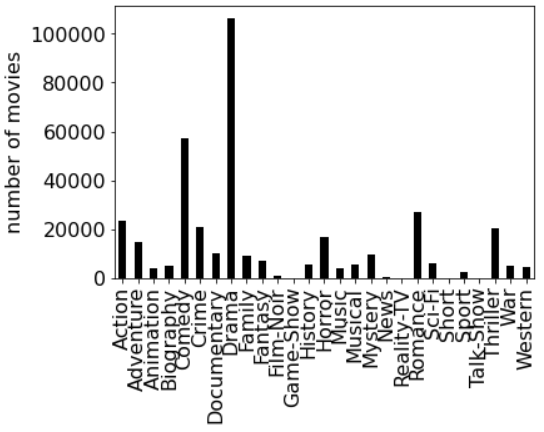</div>

In [22]:
# first compute and store the dictionary in the variable 'genre_num', then display it
genre_num = {}
for genre in genre_buckets:
    genre_count = len(genre_buckets[genre])
    genre_num[genre] = genre_count
    
genre_num

{'Drama': 106162,
 'Horror': 16606,
 'Sport': 2157,
 'Family': 8993,
 'Comedy': 57265,
 'Adventure': 14666,
 'Thriller': 20144,
 'Crime': 20655,
 'Action': 23495,
 'Fantasy': 7038,
 'History': 5183,
 'Romance': 26780,
 'Biography': 4946,
 'Sci-Fi': 5677,
 'Mystery': 9397,
 'Documentary': 10038,
 'Western': 4595,
 'Musical': 5198,
 'Animation': 3780,
 'Music': 4002,
 'War': 4873,
 'News': 152,
 'Film-Noir': 818,
 'Short': 12,
 'Reality-TV': 17,
 'Game-Show': 1,
 'Talk-Show': 1}

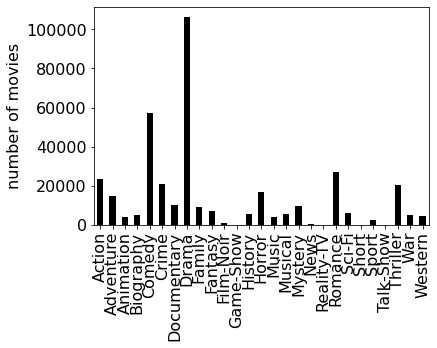

In [23]:
# now plot 'genre_num' with the y-axis labelled 'number of movies'

plot_dict(genre_num, label="number of movies")

In [24]:
grader.check("q4")

q4 results: All test cases passed!

**Food for thought:** Can you tell what the most popular **genres** are from the plot? Do you see anything surprising here?

In [25]:
# this is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to
# Zhenya and Pranu's thoughts: The most popular movie genres are drama, comedy, and romance :D

**Question 5:** **Plot** the **number** of movies **directed** by *Akira Kurosawa* in each *genre* as a **bar graph**.

You **must** only include those `genres` in which *Akira Kurosawa* has directed **at least** one movie, in your plot.

You **must** first compute a **dictionary** which maps each **genre** to the **number** of movies in that **genre** directed by *Akira Kurosawa*. Then, you may use `plot_dict` to plot the data in that dictionary.

**Important Warning:** `p9_test.py` can check that the **dictionary** has the correct key/value pairs, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. Your plots will be **manually graded**, and you will **lose points** if your plot is not visible, or if it is not properly labelled.

Your plot should look like this:
<div>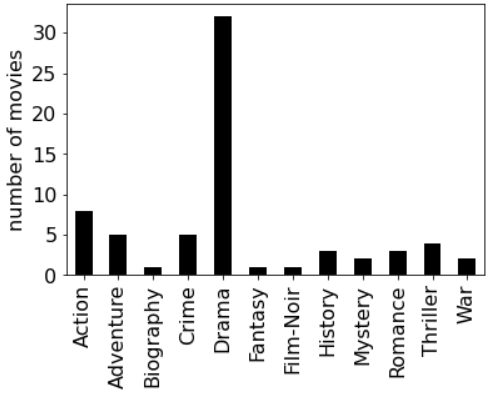</div>

In [26]:
# first compute and store the dictionary in the variable 'kurosawa_genres', then display it
kurosawa_movies = find_specific_movies(movies, "Akira Kurosawa")
kurosawa_buckets = bucketize(kurosawa_movies, "genres")
kurosawa_genres = {}

for genre in kurosawa_buckets:
    movie_count = len(kurosawa_buckets[genre])
    kurosawa_genres[genre] = movie_count
    
kurosawa_genres

{'Action': 8,
 'Drama': 32,
 'War': 2,
 'Thriller': 4,
 'Adventure': 5,
 'Fantasy': 1,
 'Biography': 1,
 'History': 3,
 'Crime': 5,
 'Mystery': 2,
 'Film-Noir': 1,
 'Romance': 3}

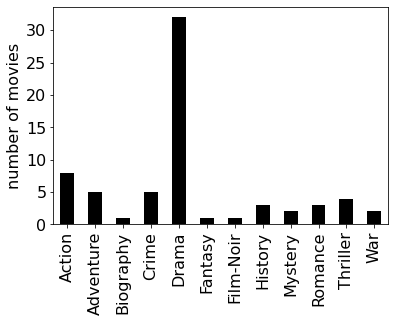

In [27]:
# now plot 'kurosawa_genres' with the y-axis labelled 'number of movies'
plot_dict(kurosawa_genres, label="number of movies")

In [28]:
grader.check("q5")

q5 results: All test cases passed!

**Food for thought:** Can you similarly **plot** the **number** of films directed by your favorite director or starring your favorite cast member in each **genre**?

In [29]:
# this is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to
# Zhenya and Pranu's thoughts: Yes, that is possible

**Question 6:** **Plot** the **number** of movies released in each *decade* as a **bar graph**.

You **must** first compute a **dictionary** which maps each **decade** to the **number** of movies in released in that **decade**. This dictionary should look like this:

```python
{'1991 to 2000': 18496,
 '2021 to 2030': 9173,
 '1961 to 1970': 14216,
 '1951 to 1960': 10981,
 '2011 to 2020': 59249,
 '2001 to 2010': 33658,
 '1941 to 1950': 7807,
 '1971 to 1980': 15556,
 '1981 to 1990': 17181,
 '1921 to 1930': 3014,
 '1931 to 1940': 8201,
 '1911 to 1920': 1068,
 '1901 to 1910': 9,
 '1891 to 1900': 1}
```

Then, you may use `plot_dict` to plot the data in that dictionary.

**Important Warning:** `p9_test.py` can check that the **dictionary** has the correct key/value pairs, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. Your plots will be **manually graded**, and you will **lose points** if your plot is not visible, or if it is not properly labelled.

Your plot should look like this:
<div>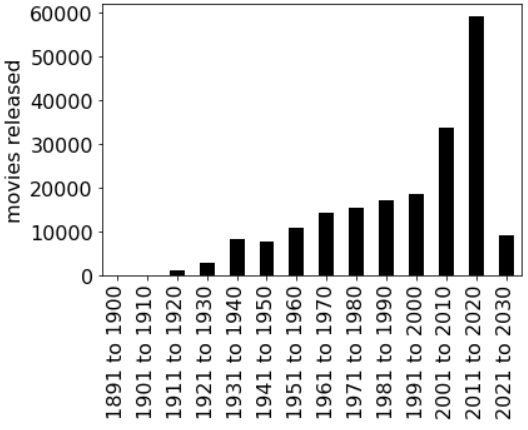</div>

In [30]:
# first compute and store the dictionary in the variable 'decade_mapping', then display it
year_num = {}
for year in year_buckets:
    year_count = len(year_buckets[year])
    year_num[year] = year_count
    
decade_buckets = {}
for year in year_num:
    decade = year_to_decade(year)
    if decade not in decade_buckets:
        decade_buckets[decade] = []
    (decade_buckets[decade]).append(year_num[year])

decade_mapping = {}
for decade in decade_buckets:
    decade_count = sum(decade_buckets[decade])
    decade_mapping[decade] = decade_count
    
decade_mapping

{'1991 to 2000': 18496,
 '2021 to 2030': 9173,
 '1961 to 1970': 14216,
 '1951 to 1960': 10981,
 '2011 to 2020': 59249,
 '2001 to 2010': 33658,
 '1941 to 1950': 7807,
 '1971 to 1980': 15556,
 '1981 to 1990': 17181,
 '1921 to 1930': 3014,
 '1931 to 1940': 8201,
 '1911 to 1920': 1068,
 '1901 to 1910': 9,
 '1891 to 1900': 1}

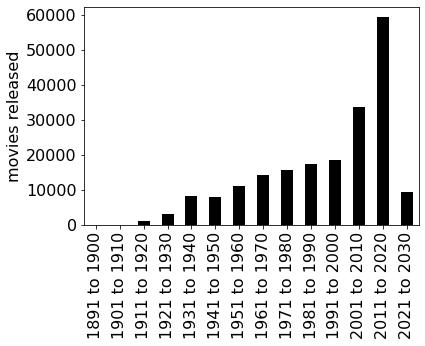

In [31]:
# now plot 'decade_mapping' with the y-axis labelled 'movies released'
plot_dict(decade_mapping, label="movies released")

In [32]:
grader.check("q6")

q6 results: All test cases passed!

**Food for thought:** Can you explain the shape of this plot? Why do you think there was a dip between the decades `1931 to 1940` and `1941 to 1950`? Can you explain why the number of movies appears to plateau around `1991 to 2000` before increasing drastically? 

In [33]:
# this is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to
# Zhenya and Pranu's thoughts: It increases as time goes on; there was likely a dip due to WW2; there was a tech boom

**Question 7:** **Plot** the **median** `rating` of movies in each *genre* as a **bar graph**.

You **must** first compute a **dictionary** which maps each **genre** to the **median** `rating` of all movies in that **genre**. Then, you may use `plot_dict` to plot the data in that dictionary.

**Important Warning:** `p9_test.py` can check that the **dictionary** has the correct key/value pairs, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. Your plots will be **manually graded**, and you will **lose points** if your plot is not visible, or if it is not properly labelled.

Your plot should look like this:
<div>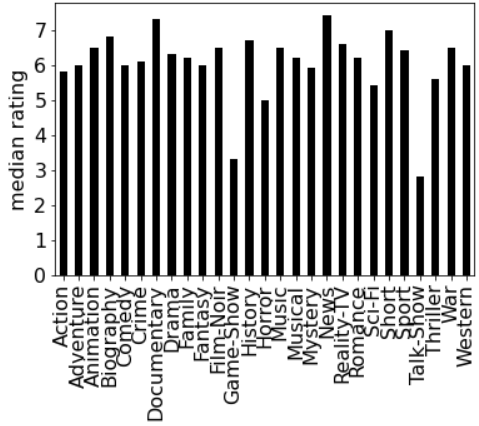</div>

In [34]:
# first compute and store the dictionary in the variable 'median_genres', then display it
genre_ratings = {}
for genre in genre_buckets:
    for movie in genre_buckets[genre]:
        movie_rating = movie["rating"]
        if genre not in genre_ratings:
            genre_ratings[genre] = []
        genre_ratings[genre].append(movie_rating)

median_genres = {}
for genre in genre_ratings:
    genre_median = median(genre_ratings[genre])
    median_genres[genre] = genre_median

median_genres

{'Drama': 6.3,
 'Horror': 5.0,
 'Sport': 6.4,
 'Family': 6.2,
 'Comedy': 6.0,
 'Adventure': 6.0,
 'Thriller': 5.6,
 'Crime': 6.1,
 'Action': 5.8,
 'Fantasy': 6.0,
 'History': 6.7,
 'Romance': 6.2,
 'Biography': 6.8,
 'Sci-Fi': 5.4,
 'Mystery': 5.9,
 'Documentary': 7.3,
 'Western': 6.0,
 'Musical': 6.2,
 'Animation': 6.5,
 'Music': 6.5,
 'War': 6.5,
 'News': 7.4,
 'Film-Noir': 6.5,
 'Short': 7.0,
 'Reality-TV': 6.6,
 'Game-Show': 3.3,
 'Talk-Show': 2.8}

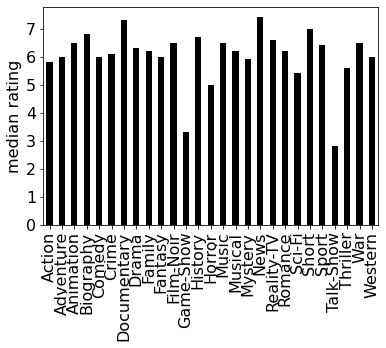

In [35]:
# now plot 'median_genres' with the y-axis labelled 'median rating'
plot_dict(median_genres, label="median rating")

In [36]:
grader.check("q7")

q7 results: All test cases passed!

**Food for thought:** Do you spot any outliers in this graph? Can you explain why they are such outliers?

In [37]:
# this is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


The visualization in q7 immediately tells us that the **median** *Documentary* movie is rated higher than the **median** *Crime* movie. However, it is a little hard to tell how the **median** *Action* movie fares against the **median** *Fantasy* movie. In order to compare the `genres`, it would be useful to **sort** the `genres` by their **median** `rating`.

**Question 8:** Produce a **list** of `genres` sorted in **decreasing order** of their **median** `rating`.

In [38]:
# compute and store the answer in the variable 'genres_desc', then display it
genres_desc_dict = dict(sorted(median_genres.items(), key = lambda m:m[1], reverse = True))
genres_desc = []

for genre in genres_desc_dict:
    genres_desc.append(genre)
    
genres_desc

['News',
 'Documentary',
 'Short',
 'Biography',
 'History',
 'Reality-TV',
 'Animation',
 'Music',
 'War',
 'Film-Noir',
 'Sport',
 'Drama',
 'Family',
 'Romance',
 'Musical',
 'Crime',
 'Comedy',
 'Adventure',
 'Fantasy',
 'Western',
 'Mystery',
 'Action',
 'Thriller',
 'Sci-Fi',
 'Horror',
 'Game-Show',
 'Talk-Show']

In [39]:
grader.check("q8")

q8 results: All test cases passed!

**Question 9:** Produce a **list** of *Animation* movies from the *Shrek* franchise sorted in **increasing** order of their `year` of release.

Your output **must** be a **list** of **dictionaries** of movies having *Shrek* as a **substring** of the `title` and *Animation* as one of their `genres`, that are **sorted** in **increasing** order of their `year`.

In [40]:
# compute and store the answer in the variable 'shrek_inc', then display it
shrek_movies = find_specific_movies(movies, "Shrek")
shrek_animated = {}
    
for movie in genre_buckets["Animation"]:
    year = movie["year"]
    if movie in shrek_movies: 
        shrek_animated[year] = movie
        
sorted_shrek_movies = dict(sorted(shrek_animated.items(), key = lambda m:m))

shrek_inc = []
for year in sorted_shrek_movies:
    shrek_inc.append(sorted_shrek_movies[year])
    
shrek_inc

[{'title': 'Shrek',
  'year': 2001,
  'duration': 90,
  'genres': ['Adventure', 'Animation', 'Comedy'],
  'rating': 7.9,
  'directors': ['Andrew Adamson', 'Vicky Jenson'],
  'cast': ['Mike Myers', 'Eddie Murphy', 'Cameron Diaz', 'John Lithgow']},
 {'title': 'Shrek 2',
  'year': 2004,
  'duration': 93,
  'genres': ['Adventure', 'Animation', 'Comedy'],
  'rating': 7.3,
  'directors': ['Andrew Adamson', 'Kelly Asbury', 'Conrad Vernon'],
  'cast': ['Mike Myers', 'Eddie Murphy', 'Cameron Diaz', 'Julie Andrews']},
 {'title': 'Shrek the Third',
  'year': 2007,
  'duration': 93,
  'genres': ['Adventure', 'Animation', 'Comedy'],
  'rating': 6.1,
  'directors': ['Chris Miller', 'Raman Hui'],
  'cast': ['Mike Myers', 'Cameron Diaz', 'Eddie Murphy', 'Antonio Banderas']},
 {'title': 'Shrek Forever After',
  'year': 2010,
  'duration': 95,
  'genres': ['Adventure', 'Animation', 'Comedy'],
  'rating': 6.3,
  'directors': ['Mike Mitchell'],
  'cast': ['Mike Myers', 'Cameron Diaz', 'Eddie Murphy', 'Ant

In [41]:
grader.check("q9")

q9 results: All test cases passed!

**Question 10:** Produce a **list** of `directors` who have directed movies in which *Denzel Washington* was `cast` in, **sorted** in **decreasing** order of the number of times they have worked with *Denzel Washington*.

Your output **must** be a **list** of **strings** of the names of the `directors` who have directed movies in which *Denzel Washington* was a `cast` member, and the **list** should be sorted in **decreasing** order of the number of times that director has worked with *Denzel Washington*.

**Hint:** If you use your `bucketize` function cleverly, you can easily organize the movies that *Denzel Washington* was `cast` in, by their director(s).

In [42]:
# compute and store the answer in the variable 'denzel_directors', then display it
denzel_movies = find_specific_movies(movies, "Denzel Washington")
denzel_movies_by_director = bucketize(denzel_movies, "directors")

denzel_director_count = {}
for director in denzel_movies_by_director:
    movie_count = len(denzel_movies_by_director[director])
    denzel_director_count[director] = movie_count
    
sorted_denzel_movies = dict(sorted(denzel_director_count.items(), key = lambda m:m[1], reverse=True))

denzel_directors = []
for director in sorted_denzel_movies:
    if director != "Denzel Washington":
        denzel_directors.append(director)
        
denzel_directors

['Tony Scott',
 'Antoine Fuqua',
 'Edward Zwick',
 'Carl Franklin',
 'Jonathan Demme',
 'Spike Lee',
 'Penny Marshall',
 'Ridley Scott',
 'Mira Nair',
 'Albert Hughes',
 'Allen Hughes',
 'John Scheinfeld',
 'Gregory Hoblit',
 'Norman Jewison',
 'Carl Schenkel',
 'Baltasar Kormákur',
 'Robert Zemeckis',
 'Joel Coen',
 'Boaz Yakin',
 'Phillip Noyce',
 'Nick Cassavetes',
 'Martin Stellman',
 'Daniel Espinosa',
 'Brett Leonard',
 'Russell Mulcahy',
 'James D. Parriott',
 'Richard Attenborough',
 'John Lee Hancock',
 'Alan J. Pakula']

In [43]:
grader.check("q10")

q10 results: All test cases passed!

## Submission
Make sure you have run all cells in your notebook in order before running the following cells, so that all images/graphs appear in the output.
It is recommended that at this stage, you Restart and Run all Cells in your notebook.
That will automatically save your work and generate a zip file for you to submit.

**SUBMISSION INSTRUCTIONS**:
1. **Upload** the zipfile to Gradescope.
2. Check **Gradescope otter** results as soon as the auto-grader execution gets completed. Don't worry about the score showing up as -/100.0. You only need to check that the test cases passed.

In [44]:
# running this cell will create a new save checkpoint for your notebook
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))

<IPython.core.display.Javascript object>

In [45]:
!jupytext --to py p9.ipynb

[jupytext] Reading p9.ipynb in format ipynb
[jupytext] Writing p9.py


In [46]:
p9_test.check_file_size("p9.ipynb")
grader.export(pdf=False, run_tests=True, files=[py_filename])

Running your submission against local test cases...

Your submission received the following results when run against available test cases:

    q1 results: All test cases passed!

    q2 results: All test cases passed!

    q3 results: All test cases passed!

    q4 results: All test cases passed!

    q5 results: All test cases passed!

    q6 results: All test cases passed!

    q7 results: All test cases passed!

    q8 results: All test cases passed!

    q9 results: All test cases passed!

    q10 results: All test cases passed!
